In [1]:
# Step 1: Import necessary libraries for loading data, preprocessing, training and evaluating Random Forest model

import pandas as pd  # For handling data in table (DataFrame) format
import numpy as np  # For numerical operations (e.g., arrays, math functions)

from sklearn.datasets import load_iris  # To load the built-in Iris dataset
from sklearn.model_selection import train_test_split  # To split the dataset into train and test sets
from sklearn.ensemble import RandomForestClassifier  # To use the Random Forest algorithm
from sklearn.preprocessing import StandardScaler  # To standardize (scale) the feature data
from sklearn.metrics import accuracy_score, classification_report  # To evaluate the model’s performance

In [6]:
# Step 2: Load and explore the Iris dataset

iris = load_iris()  # Load the Iris dataset

# Convert to pandas DataFrame for better readability
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)  # Create DataFrame with feature columns

df['target'] = iris.target  # Add target column

# Display the first 5 rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [7]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [8]:
# Step 3: Define independent and dependent variables more clearly

# Independent variables (features)
X = df[iris.feature_names]

# Dependent variable (target class)
y = df['target']

In [9]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [13]:
# Step 4: Split dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [16]:
# Step 5: Feature scaling (optional for Random Forest but good practice)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler on training features and transform
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform test features
X_test_scaled = scaler.transform(X_test)


In [17]:
# Step 6: Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

# Train on scaled training data
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Step 7: Make predictions and evaluate
from sklearn.metrics import accuracy_score, classification_report

# Predict on scaled test data
y_pred = rf_model.predict(X_test_scaled)

# Calculate accuracy
print("Test accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Test accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



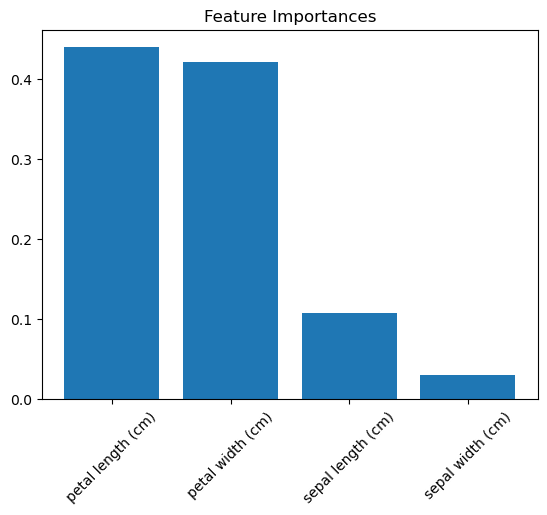

In [19]:
# Step 9: Feature Importance
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = iris.feature_names

# Sort features by importance
indices = importances.argsort()[::-1]

plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.show()


In [20]:
"""Example: Predict on New Data Point
Suppose you have a new iris flower with these features:

Sepal length = 5.7 cm

Sepal width = 3.0 cm

Petal length = 4.2 cm

Petal width = 1.2 cm """


'Example: Predict on New Data Point\nSuppose you have a new iris flower with these features:\n\nSepal length = 5.7 cm\n\nSepal width = 3.0 cm\n\nPetal length = 4.2 cm\n\nPetal width = 1.2 cm '

In [21]:
import numpy as np

# New sample (must be 2D array: one sample, four features)
new_sample = np.array([[5.7, 3.0, 4.2, 1.2]])

# Scale using the scaler fitted on training data
new_sample_scaled = scaler.transform(new_sample)

# Predict class label
prediction = rf_model.predict(new_sample_scaled)

# Map prediction number to class name
predicted_class = iris.target_names[prediction[0]]

print("Predicted class:", predicted_class)


Predicted class: versicolor


C:\Users\SAFAYET\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


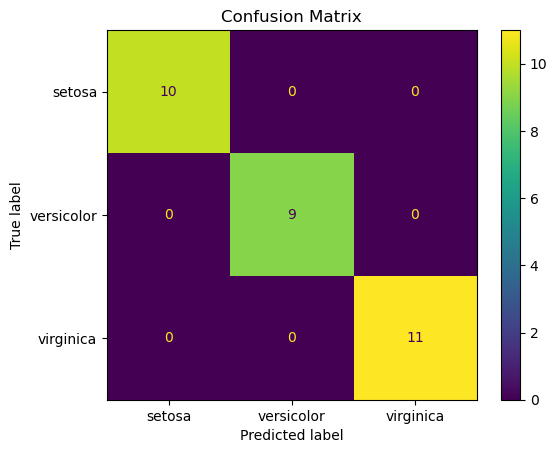

In [25]:
#
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=iris.target_names)
plt.title("Confusion Matrix")
plt.show()

# Diagonal numbers = correct predictions per class.
# Off-diagonal numbers = misclassifications, where the model got confuse
